**Importing Neccessary Libraries**

In [180]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

**Reading the Data**

In [182]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [183]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

**Feature Processing (get_dummies and LabelEncoder)**

In [185]:
le = LabelEncoder()

In [186]:
y=df['y']
y = le.fit_transform(y)
X=df.drop(['y','day_of_week'],axis=1)

In [187]:
X=pd.get_dummies(X,columns=['job','marital','default','education','housing','loan','contact','month','poutcome'])

In [188]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

**Train Test Split**

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

**Logistic Regression**

In [191]:
logreg = LogisticRegression()

In [192]:
logreg.fit(X_train,y_train)

/home/khandalaryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
preds_log = logreg.predict(X_test)

In [194]:
c_mat_log = confusion_matrix(preds_log,y_test)

In [195]:
acc_scr_log = accuracy_score(preds_log,y_test)

In [196]:
print(c_mat_log)
print(acc_scr_log)

[[10665   846]
 [  287   559]]
0.9083110787407946


**XGBClassifier**

In [197]:
xgclf = xgb.XGBClassifier()

In [198]:
xgclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [199]:
preds_xgb = xgclf.predict(X_test)

In [200]:
c_mat_xgb = confusion_matrix(preds_xgb,y_test)

In [201]:
acc_scr_xgb = accuracy_score(preds_xgb,y_test)

In [164]:
print(c_mat_xgb)
print(acc_scr_xgb)

[[10614   688]
 [  338   717]]
0.9169701383831027


**Feature Importances**

In [202]:
impo = xgclf.feature_importances_

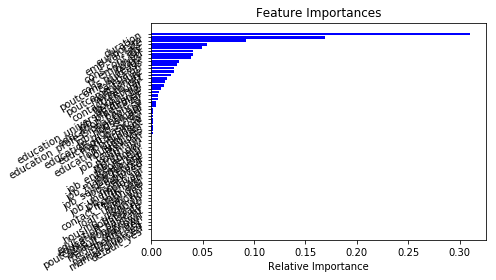

In [203]:
features = X.columns
importances = impo
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.setp(plt.gca().get_yticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [204]:
dic = {'feature':features,'importance':importances}
imp = pd.DataFrame(dic)

In [205]:
imp_f['feature'].values

array(['duration', 'euribor3m', 'emp.var.rate', 'age', 'cons.conf.idx',
       'pdays', 'nr.employed', 'cons.price.idx', 'poutcome_success',
       'campaign', 'poutcome_failure', 'month_may', 'month_oct',
       'contact_cellular', 'month_mar', 'default_no',
       'education_university.degree', 'job_blue-collar',
       'education_professional.course', 'education_basic.4y',
       'job_housemaid', 'month_apr', 'education_unknown', 'housing_yes',
       'education_high.school', 'education_basic.9y', 'previous',
       'job_student', 'marital_single', 'job_technician',
       'job_self-employed', 'job_services', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'default_unknown', 'contact_telephone',
       'month_nov', 'job_management', 'month_sep', 'job_entrepreneur',
       'poutcome_nonexistent', 'job_retired', 'loan_yes', 'default_yes',
       'loan_unknown', 'loan_no', 'housing_unknown', 'housing_no',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'job_admin

In [206]:
imp.sort_values(by='importance',ascending=False)

,feature,importance
1,duration,0.310448
8,euribor3m,0.168657
5,emp.var.rate,0.092537
0,age,0.053731
7,cons.conf.idx,0.049254
3,pdays,0.040299
9,nr.employed,0.040299
6,cons.price.idx,0.038806
57,poutcome_success,0.026866
2,campaign,0.025373


**So we only keep the important columns : 
['duration', 'euribor3m', 'emp.var.rate', 'age', 'cons.conf.idx',
       'pdays', 'nr.employed', 'cons.price.idx', 'poutcome',
       'campaign', 'month',
       'education', 'job','housing','previous']**

In [207]:
X = df[['duration', 'euribor3m', 'emp.var.rate', 'age', 'cons.conf.idx', 'pdays', 'nr.employed', 'cons.price.idx', 'poutcome', 'campaign', 'month', 'education', 'job','housing','previous']]
y = df['y']
y = le.fit_transform(y)
X=pd.get_dummies(X,columns=['job','education','housing','month','poutcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

**XGBoost**

In [209]:
xgclf = xgb.XGBClassifier()

In [210]:
xgclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [211]:
preds_xgb = xgclf.predict(X_test)

In [212]:
c_mat_xgb = confusion_matrix(preds_xgb,y_test)

In [213]:
acc_scr_xgb = accuracy_score(preds_xgb,y_test)

In [214]:
print(c_mat_xgb)
print(acc_scr_xgb)

[[10623   712]
 [  329   693]]
0.9157562515173586


**LightGBM**

In [216]:
train_data = lgb.Dataset(X_train, label=y_train)

In [217]:
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [218]:
bst = lgb.train({
    'boosting': 'gbdt', #'dart', # Dropouts meet Multiple Additive Regression Trees, default='gbdt'
    'learning_rate': 0.01, # smaller increases accuracy
    'max_bin': 511, # larger increases accuracy
    'metric': 'auc',
    'num_leaves': 63, # larger increases accuracy
    'num_trees': 100,
    'num_iteration': 1000, # default=100
    'objective': 'binary',
    },
    train_data,
    num_boost_round=500, # may be redundant with params#num_iteration
    valid_sets=[validation_data],
    early_stopping_rounds=100,
    verbose_eval=100, # logs every 100 trees
)

/home/khandalaryan/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.947135
[200]	valid_0's auc: 0.949373
[300]	valid_0's auc: 0.950859
[400]	valid_0's auc: 0.951085
Early stopping, best iteration is:
[391]	valid_0's auc: 0.951117
